## Rishik Reddy  Bandi
## 220968300
## DSE B

In [26]:
#a. Importing the required libraries. 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [27]:
#b. Loading the dataset.

df=pd.read_csv("Data1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
#c. Examine data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
#d. Identify and analyze null values using df. isnull().
print(df.isnull())
print("The number of null values are:",df.isnull().sum().sum())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [30]:
#e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


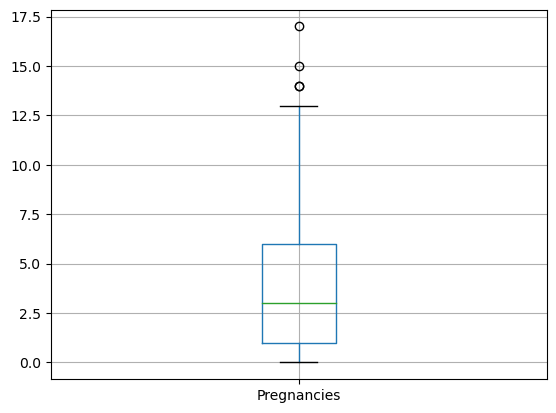

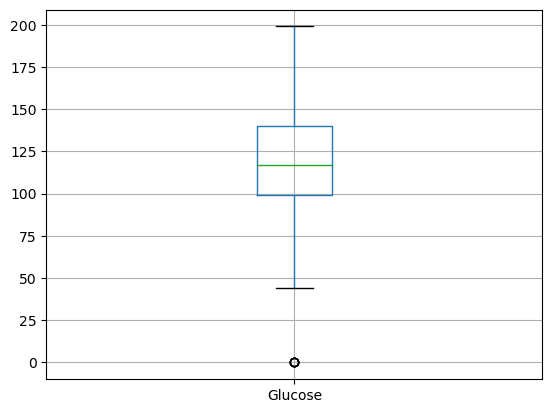

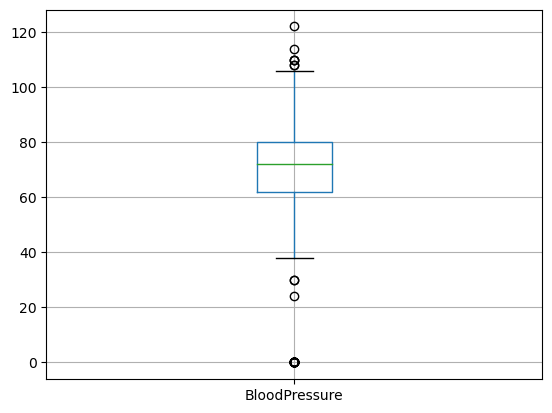

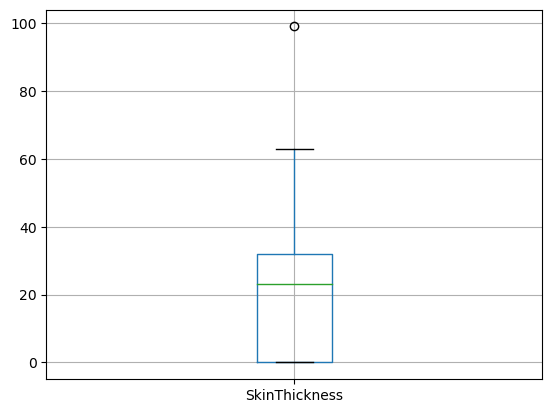

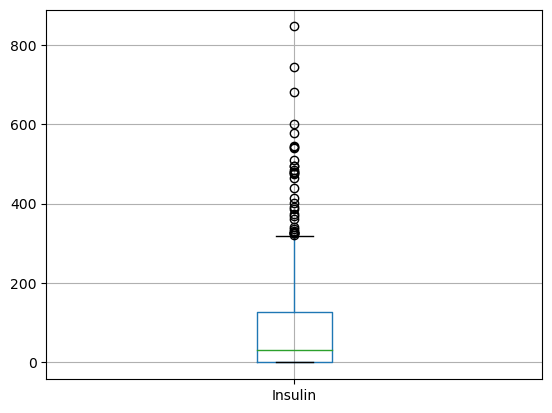

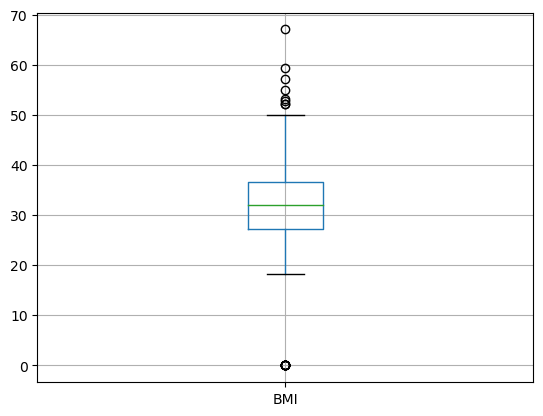

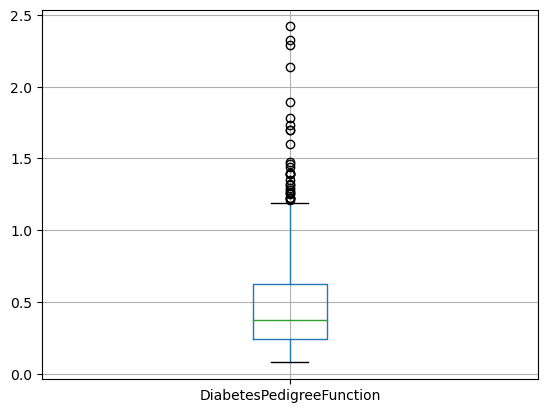

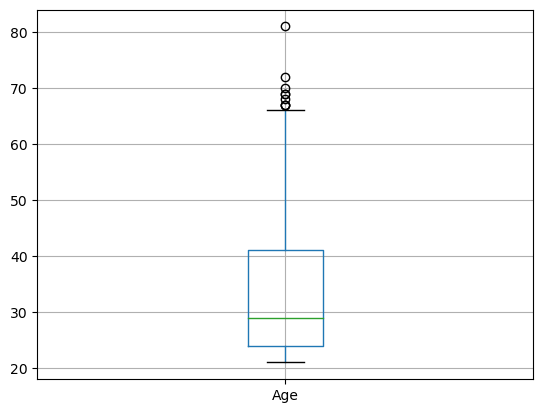

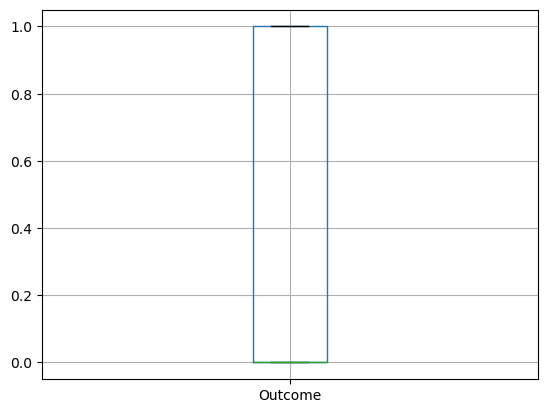

In [31]:
#f. Generate boxplots for each column to detect outliers. 

for column in df:
    plt.figure()
    df.boxplot([column])

In [32]:
#g. Determine quartiles and remove outliers.
for column in df.columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    print("The first quartile for ",column," is:",Q1)
    print("The third quartile ",column," is:",Q3)
    IQR=Q3-Q1;
    U=Q3+1.5*IQR
    L=Q1-1.5*IQR
    i=df[(df[column]<L)].index
    df.drop(i,inplace=True)
    i=df[(df[column]>U)].index
    df.drop(i,inplace=True)
df
    

The first quartile for  Pregnancies  is: 1.0
The third quartile  Pregnancies  is: 6.0
The first quartile for  Glucose  is: 99.0
The third quartile  Glucose  is: 140.0
The first quartile for  BloodPressure  is: 62.0
The third quartile  BloodPressure  is: 80.0
The first quartile for  SkinThickness  is: 0.0
The third quartile  SkinThickness  is: 33.0
The first quartile for  Insulin  is: 0.0
The third quartile  Insulin  is: 132.0
The first quartile for  BMI  is: 27.225
The third quartile  BMI  is: 36.175000000000004
The first quartile for  DiabetesPedigreeFunction  is: 0.245
The third quartile  DiabetesPedigreeFunction  is: 0.6165
The first quartile for  Age  is: 24.0
The third quartile  Age  is: 40.5
The first quartile for  Outcome  is: 0.0
The third quartile  Outcome  is: 1.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

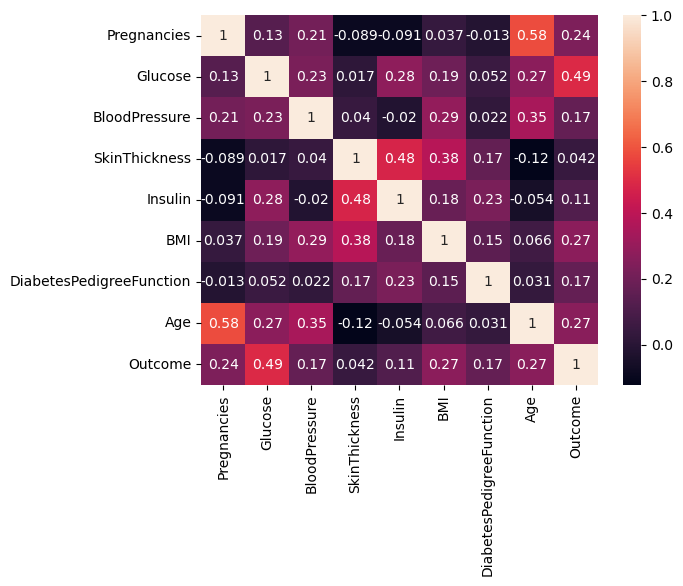

In [33]:
#h. Calculate correlations and visualize them with a heatmap.
sns.heatmap(data=df.corr(),annot=True)

In [34]:
#i. Normalize the various features of the given datasets. (MinMaxScaler) 
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(scaled,index=df.index, columns=df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.490446,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.267516,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.162420,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.284848,0.315287,0.082103,0.000000,0.0
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.235669,0.113469,0.204545,0.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.370130,0.558824,0.800000,0.545455,0.468153,0.085793,0.954545,0.0
764,0.153846,0.506494,0.470588,0.450000,0.000000,0.592357,0.241697,0.136364,0.0
765,0.384615,0.500000,0.500000,0.383333,0.339394,0.254777,0.154059,0.204545,0.0
766,0.076923,0.532468,0.323529,0.000000,0.000000,0.378981,0.250000,0.590909,1.0


In [35]:
#j. Arrange correlation values for each attribute in ascending order.
corr_matrix = df.corr()
def arrange_corr_values(df):
    for column in df.columns:
        print("for column->",column)
        print(corr_matrix[column].sort_values(ascending=True))
arrange_corr_values(df)

for column-> Pregnancies
Insulin                    -0.090608
SkinThickness              -0.088675
DiabetesPedigreeFunction   -0.013274
BMI                         0.037389
Glucose                     0.130759
BloodPressure               0.206581
Outcome                     0.235631
Age                         0.582318
Pregnancies                 1.000000
Name: Pregnancies, dtype: float64
for column-> Glucose
SkinThickness               0.017161
DiabetesPedigreeFunction    0.051546
Pregnancies                 0.130759
BMI                         0.193989
BloodPressure               0.227750
Age                         0.268977
Insulin                     0.280328
Outcome                     0.493355
Glucose                     1.000000
Name: Glucose, dtype: float64
for column-> BloodPressure
Insulin                    -0.019897
DiabetesPedigreeFunction    0.022308
SkinThickness               0.039799
Outcome                     0.171178
Pregnancies                 0.206581
Glucose     

# Visualisation

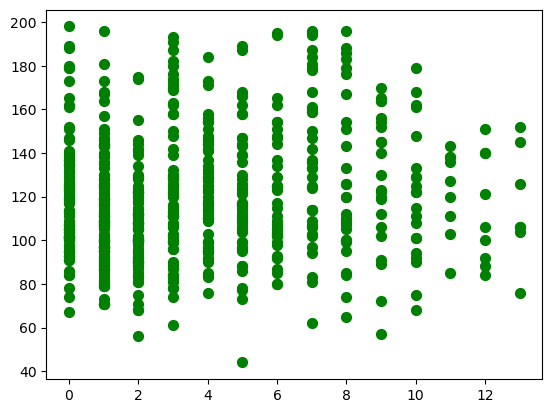

In [36]:
#a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6. 
plt.scatter(df.Pregnancies,df.Glucose,c='green',s=50)

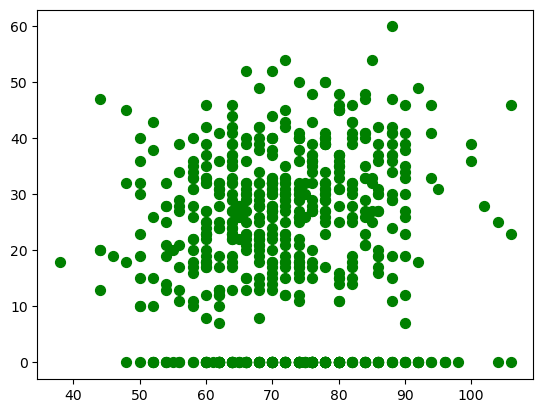

In [37]:
plt.scatter(df.BloodPressure,df.SkinThickness,c='green',s=50)

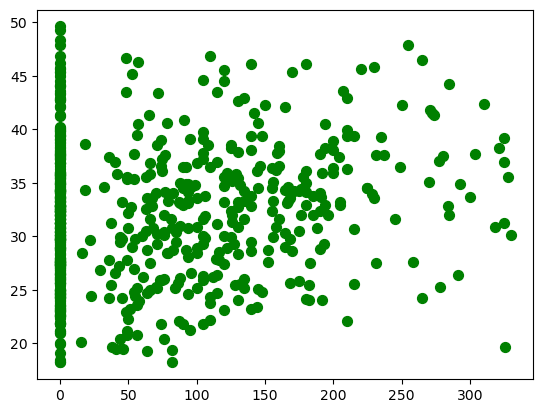

In [38]:
plt.scatter(df.Insulin,df.BMI,c='green',s=50)

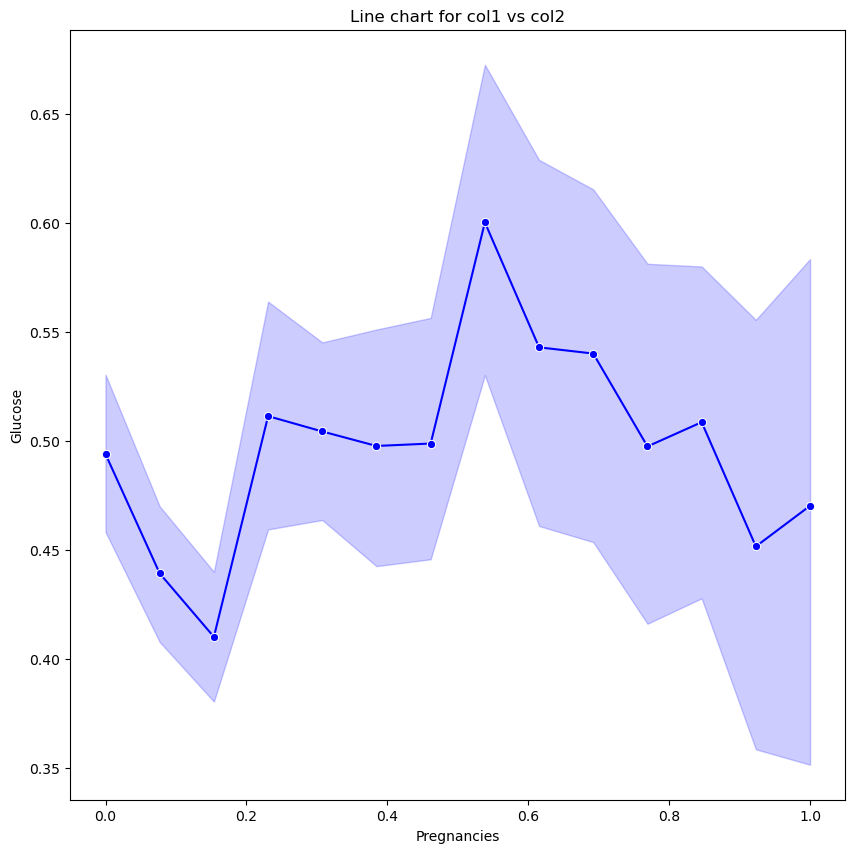

In [39]:
#b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.
plt.figure(figsize=(10, 10))
sns.lineplot(x=df_scaled['Pregnancies'],y=df_scaled['Glucose'], marker='o',linestyle='-', color='b')
plt.title("Line chart for col1 vs col2")
plt.show()


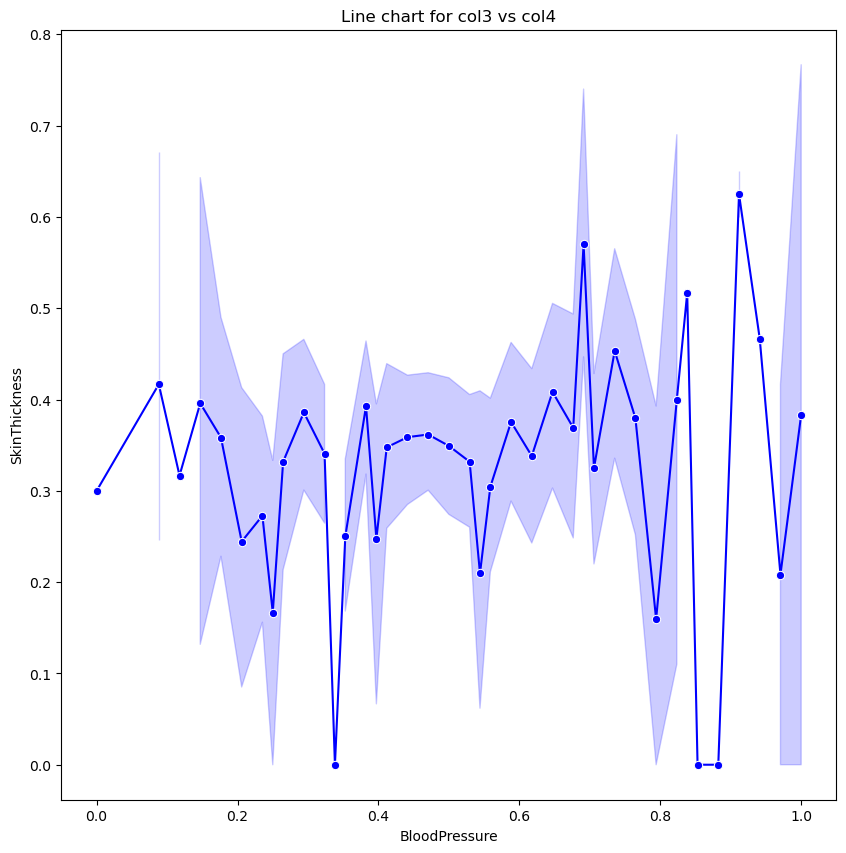

In [40]:
plt.figure(figsize=(10, 10))
sns.lineplot(x=df_scaled['BloodPressure'],y=df_scaled['SkinThickness'], marker='o',linestyle='-', color='b')
plt.title("Line chart for col3 vs col4")
plt.show()


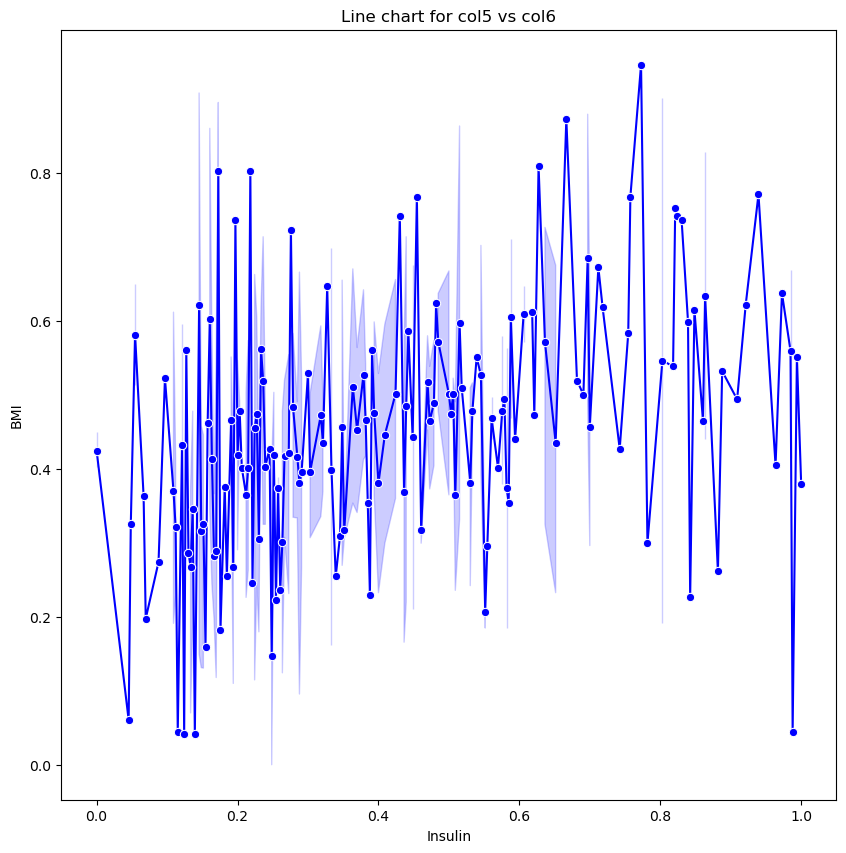

In [41]:
plt.figure(figsize=(10, 10))
sns.lineplot(x=df_scaled['Insulin'],y=df_scaled['BMI'], marker='o',linestyle='-', color='b')
plt.title("Line chart for col5 vs col6")
plt.show()

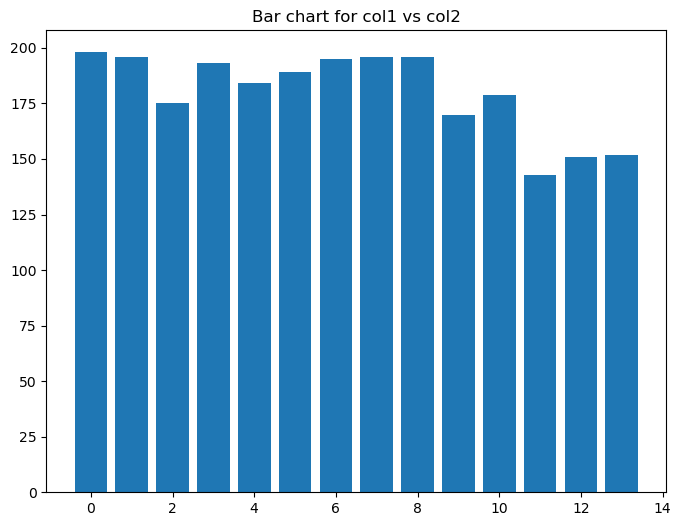

In [42]:
#c. Bar charts representing columns (1) col1, col2  (2) col3, col4 (3) col5, col6. 
plt.figure(figsize=(8, 6))
plt.bar(x=df['Pregnancies'], height=df['Glucose'])
plt.title("Bar chart for col1 vs col2")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(x=df['BloodPressure'], height=df['SkinThickness'])
plt.title("Bar chart for col3 vs col4")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(x=df['Insulin'], height=df['BMI'])
plt.title("Bar chart for col5 vs col6")
plt.show()

In [ ]:
#d. Histograms to depict the dataset's distribution.
for column in df:
    plt.figure()
    sns.histplot(data=df[column])
plt.show()